In [1]:
import sys
import os

import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import glob

# sys.path.append('/store/projects/ml/mathG/DCASE2017/baseline/DCASE2017-baseline-system/')

In [2]:
plt.rcParams["font.size"] = 16
def make_event_plot(a, sr, mel_dB, flag_start, flag_end, fig_title='sample', save_fig=False, filename='sample.png'):
    fig = plt.figure(figsize=(12, 10))

    ax1 = fig.add_subplot(311)
    librosa.display.waveplot(a, sr=sr)
    plt.title('Wave plot')

    ax2 = fig.add_subplot(312)
    disp = librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')

    ax3 = fig.add_subplot(313)
    plt.tick_params(left=False)
    plt.yticks(color="None")
    plt.title('Event flag')
    testx = [flag_start, flag_end, flag_end, flag_start]
    testy = [0,0,1,1]
    plt.xlim([0, 30])
    plt.ylim([0, 1])
    plt.fill(testx,testy,color="red")

    fig.tight_layout()

    #幅をax2と同じにする
    fig.canvas.draw()
    axpos1 = ax1.get_position() # 上の図の描画領域
    axpos2 = ax2.get_position() # 下の図の描画領域
    axpos3 = ax2.get_position() # 下の図の描画領域
    ax1.set_position([axpos1.x0, axpos1.y0, axpos2.width, axpos1.height-0.05])
    ax3.set_position([axpos3.x0, 0.24, axpos2.width, 0.03])

    fig.suptitle(fig_title, fontsize=22)
    # fig.title('hoge')
    
    if save_fig:
        plt.savefig(filename)
    else:
        plt.show()

    plt.close(fig)


In [6]:
env = os.environ
work_dir     = env['MYWORK_BASE']

base_dir = work_dir + '/data/TUT-rare-sound-events-2017-development/'
#wav = base_dir + 'generated_data/mixtures_devtrain_8273f9ece473ce936cc7aea88cfbdc3f/audio/mixture_devtrain_babycry_000_d4823d06b84d83a5b8080178c53fbfa4.wav'
# wav_dir = base_dir + 'generated_data/mixtures_devtrain_8273f9ece473ce936cc7aea88cfbdc3f/audio'

### devtrain
# meta_babycry = base_dir + 'generated_data/mixtures_devtrain_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtrain_babycry.csv'
# meta_gunshot = base_dir + 'generated_data/mixtures_devtrain_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtrain_gunshot.csv'
# meta_glassbreak = base_dir + 'generated_data/mixtures_devtrain_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtrain_glassbreak.csv'

### test
meta_babycry = base_dir + 'generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtest_babycry.csv'
meta_gunshot = base_dir + 'generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtest_gunshot.csv'
meta_glassbreak = base_dir + 'generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtest_glassbreak.csv'

meta_babycry

'/store/projects/ml/mathG/DCASE2017/myWork//data/TUT-rare-sound-events-2017-development/generated_data/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/meta/event_list_devtest_babycry.csv'

In [7]:
col_names = ['filename', 'onset', 'offset', 'label']
df_bc = pd.read_csv(meta_babycry, sep='\t', header=None, names=col_names)
df_gs = pd.read_csv(meta_gunshot, sep='\t', header=None, names=col_names)
df_gb = pd.read_csv(meta_glassbreak, sep='\t', header=None, names=col_names)
# df_bc = pd.read_csv(meta_babycry, sep='\t', names=col_names)
# df_gs = pd.read_csv(meta_gunshot, sep='\t', names=col_names)
# df_gb = pd.read_csv(meta_glassbreak, sep='\t', names=col_names)

dfs = {'babycry': df_bc, 'gunshot': df_gs, 'glassbreak': df_gb}
# dfs = {'glassbreak': df_gb}

# for index, row in df_bc.iterrows():
#     print(index)
#     print(row[0], row[1], row[2])
# os.path.split(df_bc[0][0])[1].split('.')[0]



In [8]:
# make_plots

# plot_basedir = '../../plots/wavmel/mixtures_devtrain_0367e094f3f5c81ef017d128ebff4a3c/'
plot_basedir = '../../plots/wavmel/mixtures_devtest_0367e094f3f5c81ef017d128ebff4a3c/'

for key, df in dfs.items():
#     wav = base_dir + val[]
    plot_dir = plot_basedir + key + '/'
    
    if not(os.path.exists(plot_dir)):
        os.makedirs(plot_dir)
    
    for index, row in df.iterrows():
        wav = base_dir + row[0]
        flag_start = row[1]
        flag_end   = row[2]
        
        # wave form data
        a, sr = librosa.load(wav)
        
        # mel spectrogram
        mel = librosa.feature.melspectrogram(y=a, sr=sr)
        mel_dB = librosa.power_to_db(mel, ref=np.max)
            
        # title 
        title = key + str(index)
        # plot file name        
        plot_finename = plot_dir + os.path.split(wav)[1].split('.')[0] + '.png'
            
        make_event_plot(a, sr, mel_dB, flag_start, flag_end, title, True, plot_finename)


In [ ]:
a, sr = librosa.load(wav)

mel = librosa.feature.melspectrogram(y=a, sr=sr)
mel_dB = librosa.power_to_db(mel, ref=np.max)


True

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [5]:
df = pd.read_csv(meta, sep='\t', header=None)
# print(df[1][0], df[2][0])
# print(a.shape[0]/sr)
# print(sr)

event_flag = np.zeros(a.shape[0])

start = df[1][0]
end = df[2][0]
start_index = int(start*sr)
end_index = int(end*sr)

event_flag[start_index: end_index] = 1 # event ついてる


df[0][0]

'generated_data/mixtures_devtrain_8273f9ece473ce936cc7aea88cfbdc3f/audio/mixture_devtrain_babycry_000_d4823d06b84d83a5b8080178c53fbfa4.wav'

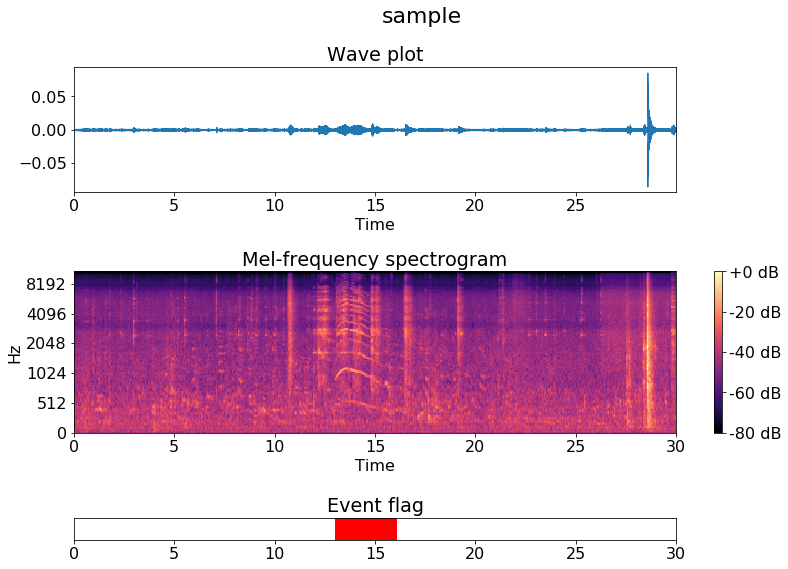

In [7]:
# 
make_event_plot(a, sr, mel_dB, start, end)


In [11]:
# a, sr, mel_dB, flag_start, flag_end

# 縦に並べる 参考
# http://sumikitch.com/blog/2019/03/11/python-matplotlib-multigraph/
# fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(14,10))
plt.rcParams["font.size"] = 16
# fig, (ax1, ax2)  = plt.subplots(2, 1, 2, figsize=(14,10))
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(311)
librosa.display.waveplot(a, sr=sr)
plt.title('Wave plot')

ax2 = fig.add_subplot(312)
disp = librosa.display.specshow(mel_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')

ax3 = fig.add_subplot(313)
plt.tick_params(left=False)
plt.yticks(color="None")
plt.title('Event flag')
testx = [start,end,end,start]
testy = [0,0,1,1]
plt.xlim([0, 30])
plt.ylim([0, 1])
plt.fill(testx,testy,color="red")

fig.tight_layout()

#幅をax2と同じにする
fig.canvas.draw()
axpos1 = ax1.get_position() # 上の図の描画領域
axpos2 = ax2.get_position() # 下の図の描画領域
axpos3 = ax2.get_position() # 下の図の描画領域
ax1.set_position([axpos1.x0, axpos1.y0, axpos2.width, axpos1.height-0.05])
ax3.set_position([axpos3.x0, 0.24, axpos2.width, 0.03])

fig.suptitle('Baby Cry 01', fontsize=22)
# fig.title('hoge')
plt.show()



RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc42885b8c8> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 864x720 with 4 Axes>

In [9]:
print('hoge')

hoge
